In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataset
df = pd.read_csv('data.csv', sep= ',', encoding='latin1')
df.head()

,ï»¿Company,Incident_date,Ride_name_dirty,Ride_name,Theme_Park,age_gender,description
0,Disney World,06/09/2022,Alien Swirling Saucers,Alien Swirling Saucers,Hollywood Studios,59 yof,guest with pre-existing condition sustained in...
1,Disney World,10/05/2014,Astro Orbiter,Astro Orbiter,Magic Kingdom,68 yom,"guest fell exiting vehicle, developed blood c..."
2,Disney World,12/03/2009,Astro Orbitor,Astro Orbiter,Magic Kingdom,40 yof,fractured left ankle exiting ride
3,Disney World,08/07/2022,Avatar Flight of Passage,Avatar Flight of Passage,Animal Kingdom,83 yom,guest with pre-existing condition was briefly ...
4,Disney World,4/19/22,Avatar Flight of Passage,Avatar Flight of Passage,Animal Kingdom,42 yof,guest with pre-existing condition had motion s...


In [89]:
def clean_column_name(column_name):
    # Replace underscores with spaces and capitalize each word
    words = column_name.split('_')
    capitalized_words = [w.capitalize() for w in words]
    return ' '.join(capitalized_words)

In [90]:
df.rename(columns={'ï»¿Company': 'Company'}, inplace=True)
# Rename the columns by applying the clean_column_name function
df.rename(columns=lambda x: clean_column_name(x), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company          682 non-null    object
 1   Incident Date    682 non-null    object
 2   Ride Name Dirty  682 non-null    object
 3   Ride Name        682 non-null    object
 4   Theme Park       682 non-null    object
 5   Age Gender       682 non-null    object
 6   Description      682 non-null    object
dtypes: object(7)
memory usage: 37.4+ KB


In [91]:
df['Company'].value_counts()

Company
Disney World    502
Universal       179
Universal:        1
Name: count, dtype: int64

In [92]:
# Replace "Universal:" with "Universal" in the 'Company' column
df['Company'] = df['Company'].str.replace('Universal:', 'Universal')

In [93]:
# Convert to datetime yyyy-mm-dd
df['Incident Date'] = pd.to_datetime(
    df['Incident Date'], errors='coerce',  format='mixed')
df.sample(6)

,Company,Incident Date,Ride Name Dirty,Ride Name,Theme Park,Age Gender,Description
291,Disney World,2008-12-22,Kilimanjaro Safari,Kilimanjaro Safaris Expedition,Animal Kingdom,51 yof,seizure
336,Universal,2013-07-31,Men in Black Alien Attack,Men In Black,Universal Studios,22 yof,abdominal pain
382,Disney World,2006-02-14,Peter PanÃÂ¢ÃÂÃÂs Flight,Peter Pan's Flight,Magic Kingdom,70 yom,Guest tripped and fell into the ride path as h...
255,Disney World,2008-05-26,Honey I Shrunk the Kids,Honey I Shrunk The Kids,Hollywood Studios,47 yof,went down slide & fractured ankle
460,Disney World,2014-12-18,Seven Dwarfs Mine Train,Seven Dwarfs Mine Train,Magic Kingdom,54 yom,guest wilt preexisting condition felt ill afte...
288,Disney World,2017-12-29,Kilimanjaro Safari,Kilimanjaro Safaris Expedition,Animal Kingdom,70 yof,guest with pre-existing condition experienced ...


In [94]:
df["Age Gender"].value_counts()

Age Gender
68 yof    15
57 yof    12
57 yom    11
72 yof    11
59 yom    11
          ..
1 yom      1
82 yom     1
80 yof     1
86 yof     1
3 yof      1
Name: count, Length: 169, dtype: int64

In [95]:
# Remove any leading/trailing white space from the age_gender column
df['Age Gender'] = df['Age Gender'].str.strip()

# Take the last character of the string and use this as gender (there is just female or male)
df['Gender'] = df['Age Gender'].str[-1:]

# With the assumption all our guests are under 100  years old to be visiting theme parks I am taking
# the first 2 characters of the Age Gender column and use this to populate the age column
df['Age'] = df['Age Gender'].str[:2]

# remove any white space for guests that are less than 10 years old and store this as an integer.
df['Age'] = df['Age'].astype(int)

# With age and gender extracted we can now remove the Age Gender column from our original dataframe.
df.drop(columns=['Age Gender'], inplace=True)

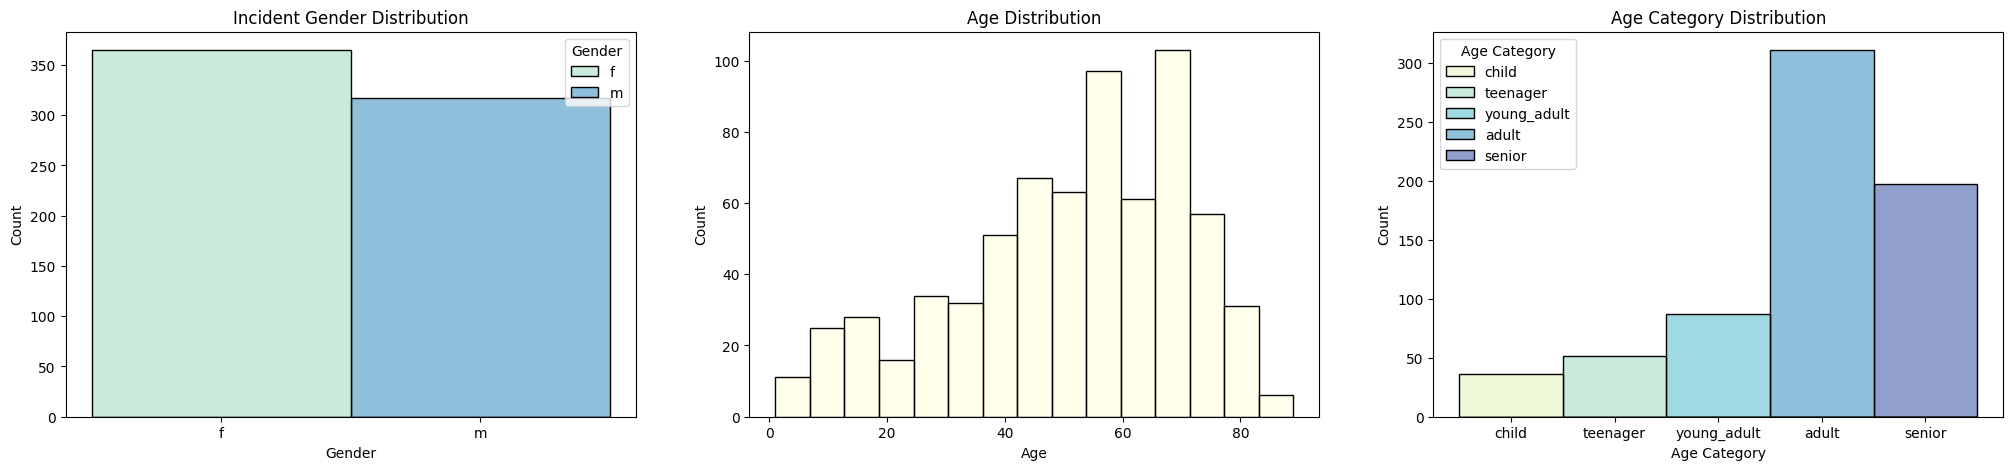

In [96]:
df['Age Category'] = pd.cut(df['Age'], bins=[0, 12, 25, 40, 65, 100], 
                            labels=['child', 'teenager', 'young_adult', 'adult', 'senior'])

# Check the age gender distributions
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,5))
palette = 'YlGnBu'
sns.histplot(x=df['Gender'], hue=df['Gender'], ax=axes[0], palette=palette)
sns.histplot(x=df['Age'], hue=15, ax=axes[1], legend=False, palette=palette) 
sns.histplot(x=df['Age Category'], hue=df["Age Category"], ax=axes[2], palette=palette) 

axes[0].set_title('Incident Gender Distribution')
axes[1].set_title('Age Distribution')
axes[2].set_title("Age Category Distribution");

In [97]:
# Dates of incidents 
df['Day of Month'] = df['Incident Date'].dt.day
df['Month of Incident'] = df['Incident Date'].dt.month
df['Year of Incident'] = df['Incident Date'].dt.year
df['Day of Week'] = df['Incident Date'].dt.day_name()

df.head()

,Company,Incident Date,Ride Name Dirty,Ride Name,Theme Park,Description,Gender,Age,Age Category,Day of Month,Month of Incident,Year of Incident,Day of Week
0,Disney World,2022-06-09,Alien Swirling Saucers,Alien Swirling Saucers,Hollywood Studios,guest with pre-existing condition sustained in...,f,59,adult,9,6,2022,Thursday
1,Disney World,2014-10-05,Astro Orbiter,Astro Orbiter,Magic Kingdom,"guest fell exiting vehicle, developed blood c...",m,68,senior,5,10,2014,Sunday
2,Disney World,2009-12-03,Astro Orbitor,Astro Orbiter,Magic Kingdom,fractured left ankle exiting ride,f,40,young_adult,3,12,2009,Thursday
3,Disney World,2022-08-07,Avatar Flight of Passage,Avatar Flight of Passage,Animal Kingdom,guest with pre-existing condition was briefly ...,m,83,senior,7,8,2022,Sunday
4,Disney World,2022-04-19,Avatar Flight of Passage,Avatar Flight of Passage,Animal Kingdom,guest with pre-existing condition had motion s...,f,42,adult,19,4,2022,Tuesday


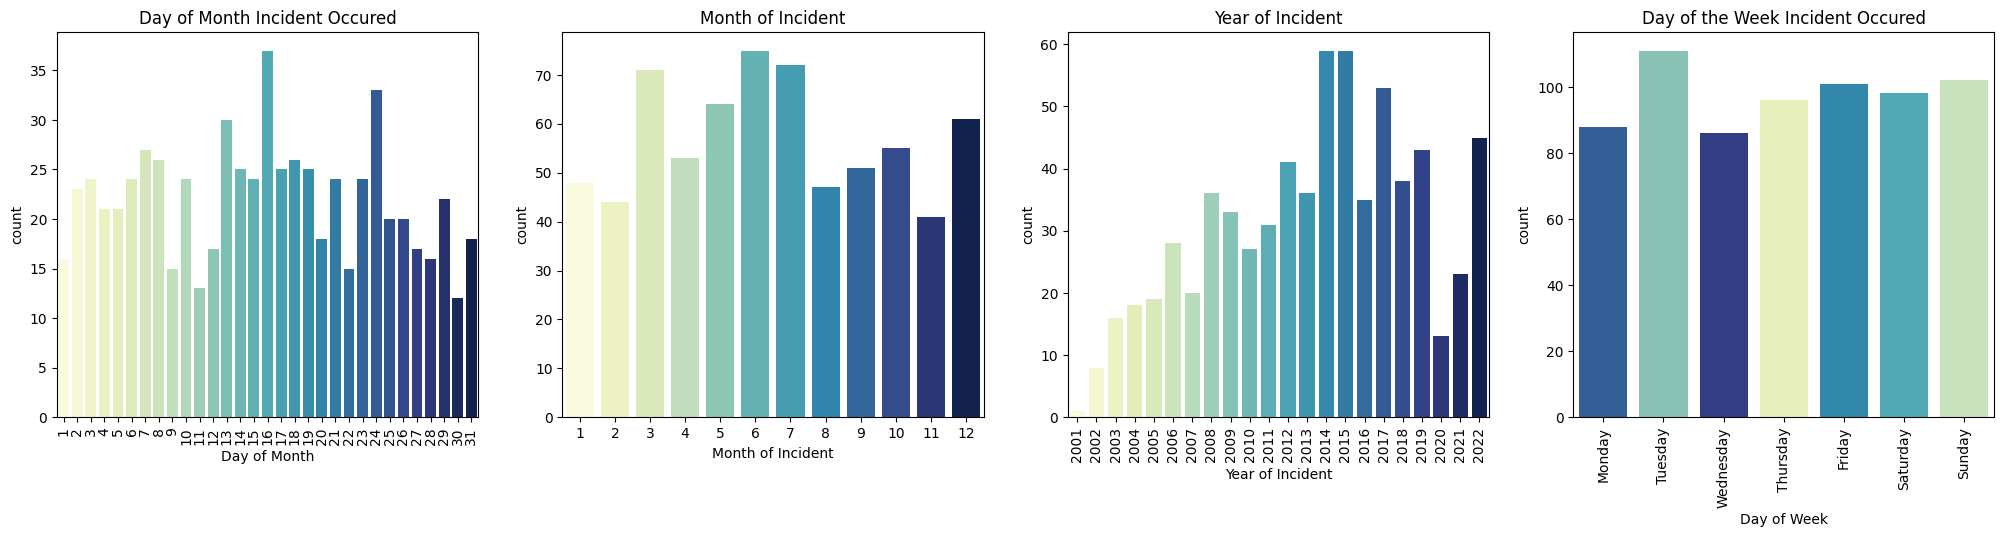

In [98]:
# Check the dates distributions

# Define the order of the days of the week
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,5))
palette = 'YlGnBu'
sns.countplot(x=df['Day of Month'], hue=df['Day of Month'], ax=axes[0], legend=False, palette=palette)
sns.countplot(x=df['Month of Incident'], hue=df['Month of Incident'], ax=axes[1], legend=False, palette=palette) 
sns.countplot(x=df['Year of Incident'], hue=df["Year of Incident"], ax=axes[2], legend=False, palette=palette) 
sns.countplot(x=df['Day of Week'], hue=df['Day of Week'], ax=axes[3], legend=False, palette=palette, order=week_order)

axes[0].set_title('Day of Month Incident Occured')
axes[1].set_title('Month of Incident')
axes[2].set_title('Year of Incident')
axes[3].set_title('Day of the Week Incident Occured')

# Rotate the necessary x-axis labels by 90 degrees
# Before calling set_xticklabels, first use set_xticks to set the positions of the ticks on the x-axis
axes[0].set_xticks(axes[0].get_xticks())
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[2].set_xticks(axes[2].get_xticks())
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)
axes[3].set_xticks(axes[3].get_xticks())
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=90);

Podemos ver que los meses de más accidentes corresponden con Semana Santa, Verano y Navidades que son las épocas de más afluencia a los parques.

En cuanto a los años vemos que en 2014, 2015 y 2016 un elevado número de incidentes. Apreciamos también un gran descenso en el 2020, que debido a la pandemia estuvieron cerrados durante un tiempo.

En cuanto a los días de la semana vemos que son bastante similares aunque cabe destacar que el día con más incidentes es el martes.

# Indicadores del incidente 
Vamos a crear una serie de indicadores para comprobar qué ha sucedido a través de la columna de la descripción:
- mareo/vértigo,
- dolor físico,
- dolor de pecho o presión arterial alta, 
- dificultades respiratorias,
- convulsiones, 
- perdida de conciencia, 
- condición preexistente conocida, 
- accidente cerebrovascular
- visita al hospital, 
- fallecimiento

In [99]:
def sickness_ind(description_text):
    sickness_string = ['sickness', 'motion sickness', 'dizzy', 'ill', 'not feeling well', 'dizziness', 'vertigo', 'disoriented', 'nausea', 'confusion', 'vomiting', 'vomit']
    if any(x in description_text.lower() for x in sickness_string):
        return 1
    else:
        return 0

df['sickness ind'] = df['Description'].apply(sickness_ind)
df['sickness ind'].value_counts()

sickness ind
0    477
1    205
Name: count, dtype: int64

In [100]:
def physical_pain_ind(description_text):
    physical_string = ['fell', 'fracture', 'fractured', 'laceration', 'lacerated', 'tear', 'tripped', 'hit', 'fx', 'rash', 'broke', 'injury', 'injured', 'broken', 'struck', 'hip', 'blood', 'open wound', 'wound']    
    if any(x in description_text.lower() for x in physical_string):
        return 1
    else:
        return 0
    
df['physical pain ind'] = df['Description'].apply(physical_pain_ind)
df['physical pain ind'].value_counts()

physical pain ind
0    531
1    151
Name: count, dtype: int64

In [101]:
def chest_problem_ind(description_text):
    chest_problems = ['rapid heart rate', 'chest pain', 'hypertension']
    if any(x in description_text.lower() for x in chest_problems):
        return 1
    else: 
        return 0

df['chest problem ind'] = df['Description'].apply(chest_problem_ind)
df['chest problem ind'].value_counts()

chest problem ind
0    596
1     86
Name: count, dtype: int64

In [102]:
def seizure_ind(description_text):
    if "seizure" in description_text.lower():
        return 1
    else: 
        return 0

df['seizure ind'] = df['Description'].apply(seizure_ind)
df['seizure ind'].value_counts()

seizure ind
0    616
1     66
Name: count, dtype: int64

In [103]:
def unconscious_ind(description_text):
    unconscious_string = ['unconscious', 'syncope', 'passed out', 'fainted', 'faint', 'fainting', 'collapsed', 'loss of consciousness', 'unresponsive']
    if any(x in description_text.lower() for x in unconscious_string):
        return 1
    else:
        return 0
    
df['unconscious ind'] = df['Description'].apply(unconscious_ind)
df['unconscious ind'].value_counts()

unconscious ind
0    609
1     73
Name: count, dtype: int64

In [104]:
def known_condition_ind(description_text):
    pre_existing_string = ['pre-existing', 'pre existing', 'with history of', 'hypertension']
    if any(x in description_text.lower() for x in pre_existing_string):
        return 1
    else:
        return 0
    
df['known condition ind'] = df['Description'].apply(known_condition_ind)
df['known condition ind'].value_counts()

known condition ind
0    554
1    128
Name: count, dtype: int64

In [105]:
def hospital_ind(description_text):
    if "hospital" in description_text.lower():
        return 1
    else:
        return 0

df['hospital ind'] = df['Description'].apply(hospital_ind)
df['hospital ind'].value_counts()

hospital ind
0    664
1     18
Name: count, dtype: int64

In [106]:
def deceased_ind(description_text):
    deceased_string = ['passed away', 'died', 'dead']    
    if any(x in description_text.lower() for x in deceased_string):
        return 1
    else:
        return 0

df['deceased ind'] = df['Description'].apply(deceased_ind)
df['deceased ind'].value_counts()

deceased ind
0    657
1     25
Name: count, dtype: int64

In [107]:
def breathing_issues_ind(description_text):
    respiratory_keywords = ['breath', 'breathing', 'cough', 'wheeze', 'choking']
    if any(x in description_text.lower() for x in respiratory_keywords):
        return 1
    else:
        return 0

df['breathing issues ind'] = df['Description'].apply(breathing_issues_ind)
df['breathing issues ind'].value_counts()

breathing issues ind
0    663
1     19
Name: count, dtype: int64

In [108]:
def stroke_ind(description_text):
    if "stroke" in description_text.lower():
        return 1
    else:
        return 0

df['stroke ind'] = df['Description'].apply(stroke_ind)
df['stroke ind'].value_counts()

stroke ind
0    670
1     12
Name: count, dtype: int64

In [109]:
df.iloc[473]["Description"]

'guest experienced stroke like symptoms while on the attraction'

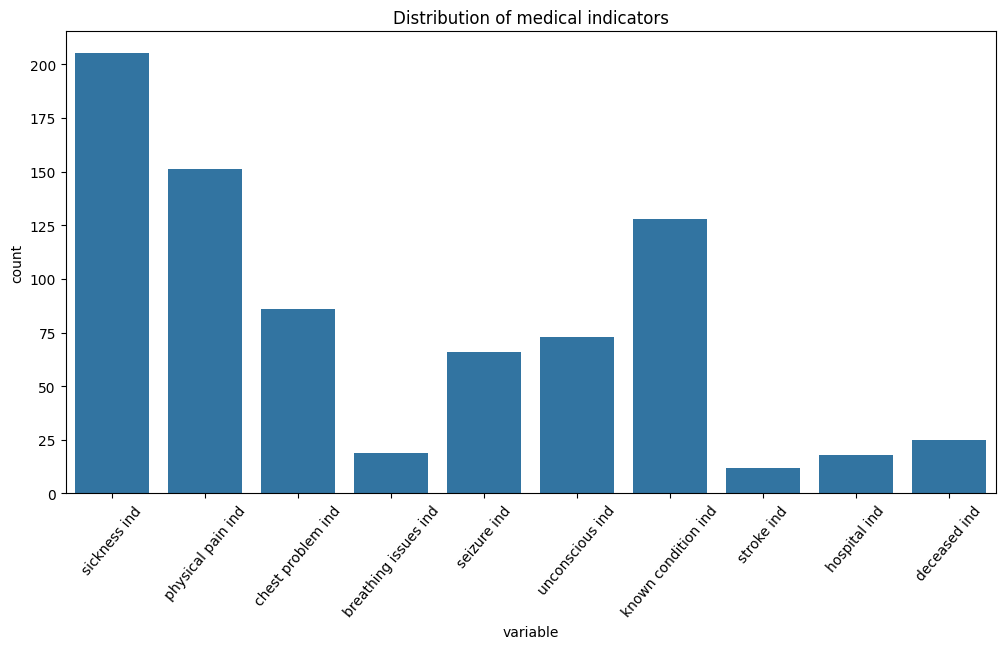

In [110]:
# Melt the dataframe and show a plot with the values of each medical column where the value is 1
df_melt = pd.melt(df[['sickness ind', 'physical pain ind', 'chest problem ind', 'breathing issues ind', 'seizure ind', 'unconscious ind', 'known condition ind', 'stroke ind', 'hospital ind', 'deceased ind']])
plt.figure(figsize=(12,6))
c1 = sns.countplot(data=df_melt.loc[df_melt['value']!=0], x='variable')

# Ensure tick locations are set before setting tick labels
c1.set_xticks(c1.get_xticks())
c1.set_xticklabels(c1.get_xticklabels(), rotation=50)

plt.title("Distribution of medical indicators");

In [111]:
def ride_type(ride_name):
    thrill_ride = ['Harry Potter and the Forbidden Journey', 'Mission: Space', 'Test Track', 'Back to the Future',
                   'Dinosaur', "Dr Doom's Fearfall", 'Men In Black', "Soarin' Around the World", 'Star Tours: The Adventure Continues',
                   'The Twilight Zone Tower of Terror', "Avatar Flight of Passage", "Disaster", "Fast & Furious - Supercharged",
                   "Halloween Horror Nights", "Harry Potter and the Escape from Gringotts", "Millennium Falcon: Smugglers Run",
                   "Star Wars: Rise of the Resistance", "Storm Force Acceleration", "The Amazing Adventures of Spiderman", 
                   "The Simpsons Ride", "Transformers: The Ride 3D"]
    family_ride = ['Carousel of Progress', 'Dumbo', 'Great Movie Ride', 'Haunted Mansion', 'Kilimanjaro Safaris Expedition',
                   'The Liberty Belle', 'Mad Tea Party', "Peter Pan's Flight", 'Pirates of the Caribbean', 
                   'Spaceship Earth', "Ellen's Energy Adventure", "Alien Swirling Saucers", "Astro Orbiter", "Chair Lift", 
                   "Buzz Lightyears Space Ranger Spin", "Camp Jurassic", "Caro-Seuss-el", "Despicable Me Minion Mayhem",
                   "The Cat In The Hat", "E.T Adventure", "Fievel's Playground", "Flight of the Hippogriff", "Frozen Ever After",
                   "Gran Fiesta Tour Attraction", "Honey I Shrunk The Kids", "If I Ran the Zoo", "It's A Small World",
                   "Journey info Imagination with Figment", "Jungle Cruise", "Kang & Kodos Twirl n' Hurl",
                  "Liberty Riverboat", "Living with the Land", "Maelstrom", "Mickey & Minnie's Runaway Railway", "Na'vi River Journey",
                   "Poseidon's Fury", "Prince Charming Regal Carousel", "Remy' s Ratatouille Adventure", "The Seas with Nemo & Friends",
                   "Snow White's Scary Adventures", "Studio Backlot Tour", "Terminator 2: 3D", "The Barnstormer", 
                   "The Magic Carpets of Aladdin", "The Many Adventures of Winnie the Pooh", "Tomorrowland Speedway",
                   "Tomorrowland Transit Authority People Mover", "Toy Story Midway Mania!", 
                   "Under the Sea - Journey of the Little Mermaid", "Walt Disney World Railroad", "Wildlife Express"]
    roller_coaster = ['Space Mountain', 'Expedition Everest', 
                      "Rock 'n' Roller Coaster Starring Aerosmith",
                      'Big Thunder Mountain Railroad', 'Dragon Challenge', 'The Incredible Hulk Coaster','Revenge of the Mummy',
                      "Hagrid's Magical Creatures Motorbike Adventure", "Hollywood Rip Ride Rocket", "Jurassic World VelociCoaster",
                      "Primeval Whirl", "Seven Dwarfs Mine Train", "Slinky Dog Dash"]
    water_ride = ['Surf Pool', 'Cross County Creek', "Crush n' Gusher", 'Downhill Double Dipper', 'Kali River Rapids',
                 'Mayday Falls', 'Meltaway Bay', 'Slush Gusher', 'Splash Mountain', 'Summit Plummet', "Castaway Creek",
                  "Dudley Do Rights Ripsaw Falls", "Humunga Kowabunga", "Jurassic Park River Adventure", "Tai Nui Serpentine Body Slide",
                  "Kala Serpentine Body Slide", "Ko'okiri Body Plunge", "Kopiko Wai Winding River", "Miss Adventure Falls", 
                  "Oh! No! Drop Slide", "Puihi Raft Ride", "Punga Racers", "Runamukka Reef", "Storm Slide-Rudder Buster",
                  "Teamboat Springs", "Te'awa The Fearless River", "Toboggan Racers"]
    
    # Loop through each ride and see which group the ride_name belongs to
    if any(x in ride_name for x in thrill_ride):
        return "thrill ride"
    elif any(x in ride_name for x in family_ride):
        return "family ride"
    elif any(x in ride_name for x in roller_coaster):
        return "roller coaster"
    elif any(x in ride_name for x in water_ride):
        return "water ride"
    else:
        # If all is done correctly this should have zero values
        return "other"
    
df['Ride type'] = df['Ride Name'].apply(ride_type)
# Ensure that there are no rides in the other category as all rides should be placed in a bucket
print(df.loc[df['Ride type'] == "other", :])

Empty DataFrame
Columns: [Company, Incident Date, Ride Name Dirty, Ride Name, Theme Park, Description, Gender, Age, Age Category, Day of Month, Month of Incident, Year of Incident, Day of Week, sickness ind, physical pain ind, chest problem ind, seizure ind, unconscious ind, known condition ind, hospital ind, deceased ind, breathing issues ind, stroke ind, Ride type]
Index: []

[0 rows x 24 columns]


In [112]:
# Define el orden específico de las columnas
column_order = ['Company', 'Incident Date', 'Ride Name Dirty', 'Ride Name', 'Ride type',
       'Theme Park', 'Description', 'Gender', 'Age', 'Age Category',
       'Day of Month', 'Month of Incident', 'Year of Incident', 'Day of Week',
       'sickness ind', 'physical pain ind', 'chest problem ind', 'seizure ind',
       'unconscious ind', 'known condition ind', 'hospital ind',
       'deceased ind', 'breathing issues ind', 'stroke ind']

# Reindexa el dataframe con el orden específico de las columnas
df = df[column_order]
df.sample(4)

,Company,Incident Date,Ride Name Dirty,Ride Name,Ride type,Theme Park,Description,Gender,Age,Age Category,...,sickness ind,physical pain ind,chest problem ind,seizure ind,unconscious ind,known condition ind,hospital ind,deceased ind,breathing issues ind,stroke ind
403,Disney World,2022-02-22,Prince Charming Regal Carousel,Prince Charming Regal Carousel,family ride,Magic Kingdom,guest fell stepping down from attraction,f,74,senior,...,0,1,0,0,0,0,0,0,0,0
366,Disney World,2016-02-19,Mission Space; Test Track,Mission: Space,thrill ride,Epcot,guest with preexisting heart condition felt il...,m,57,adult,...,1,0,0,0,0,0,0,0,0,0
646,Disney World,2007-10-19,Tower of Terror,The Twilight Zone Tower of Terror,thrill ride,Hollywood Studios,Fell ill after riding attraction claimed memo...,m,77,senior,...,1,1,0,0,0,0,0,0,0,0
644,Disney World,2008-07-30,Tower of Terror,The Twilight Zone Tower of Terror,thrill ride,Hollywood Studios,felt disoriented and dizzy,m,62,adult,...,1,0,0,0,0,0,0,0,0,0


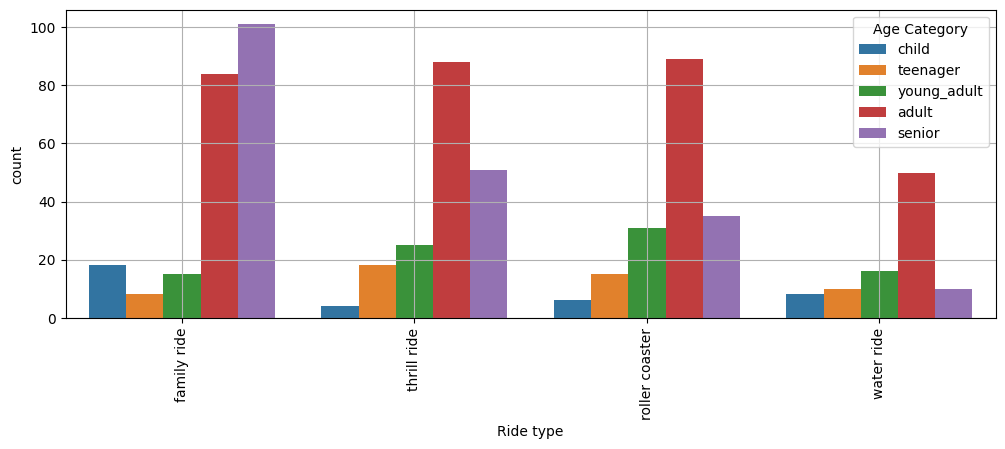

In [113]:
# Visualise incidents by ride_family and age_category
plt.figure(figsize=(12,4))
c1 = sns.countplot(x=df['Ride type'], hue=df['Age Category'])
c1.set_xticks(c1.get_xticks())
c1.set_xticklabels(c1.get_xticklabels(), rotation=90)
plt.grid();

In [125]:
df['Company'].value_counts()

Company
Disney World    502
Universal       180
Name: count, dtype: int64

Vemos que tenemos muchos más datos de Disney World que de Universal. Necesitaríamos más información para determinar si hay más incidentes en el primero por menor seguridad o porque tiene muchos más visitantes que el segundo.

In [122]:
# Define the columns to be one-hot encoded
one_hot_encoded_cat = pd.get_dummies(df[['Ride type', 'Gender', 'Age Category']])

# Define a mapping dictionary for days of the week to numbers
days_of_week = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}
# Create a new column in the DataFrame with the days of the week converted to numbers
df['Day of Week Number'] = df['Day of Week'].map(days_of_week)

# Define our list of features
features = pd.DataFrame({
    'Day of Week Number' : df['Day of Week Number'],
    'Month of Incident': df['Month of Incident'],
    'Year of Incident' : df['Year of Incident'],
    'sickness ind' : df['sickness ind'],
    'physical pain ind' : df['physical pain ind'],
    'chest problem ind' : df['chest problem ind'],
    'seizure ind' : df['seizure ind'],
    'unconscious ind' : df['unconscious ind'],
    'known condition ind' : df['known condition ind'],
    'hospital ind' : df['hospital ind'],
    'deceased ind' : df['deceased ind'],
})

In [123]:
# Create a new dataframe that takes our numerical features and our one hot encoded columns and concatenates them together
df2 = pd.concat([features, one_hot_encoded_cat], axis=1)
df2.head()

,Day of Week Number,Month of Incident,Year of Incident,sickness ind,physical pain ind,chest problem ind,seizure ind,unconscious ind,known condition ind,hospital ind,...,Ride type_roller coaster,Ride type_thrill ride,Ride type_water ride,Gender_f,Gender_m,Age Category_child,Age Category_teenager,Age Category_young_adult,Age Category_adult,Age Category_senior
0,4,6,2022,0,1,0,0,0,1,0,...,False,False,False,True,False,False,False,False,True,False
1,7,10,2014,0,1,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,True
2,4,12,2009,0,1,0,0,0,0,0,...,False,False,False,True,False,False,False,True,False,False
3,7,8,2022,0,0,0,0,1,1,0,...,False,True,False,False,True,False,False,False,False,True
4,2,4,2022,1,0,0,0,0,1,0,...,False,True,False,True,False,False,False,False,True,False


<Axes: >

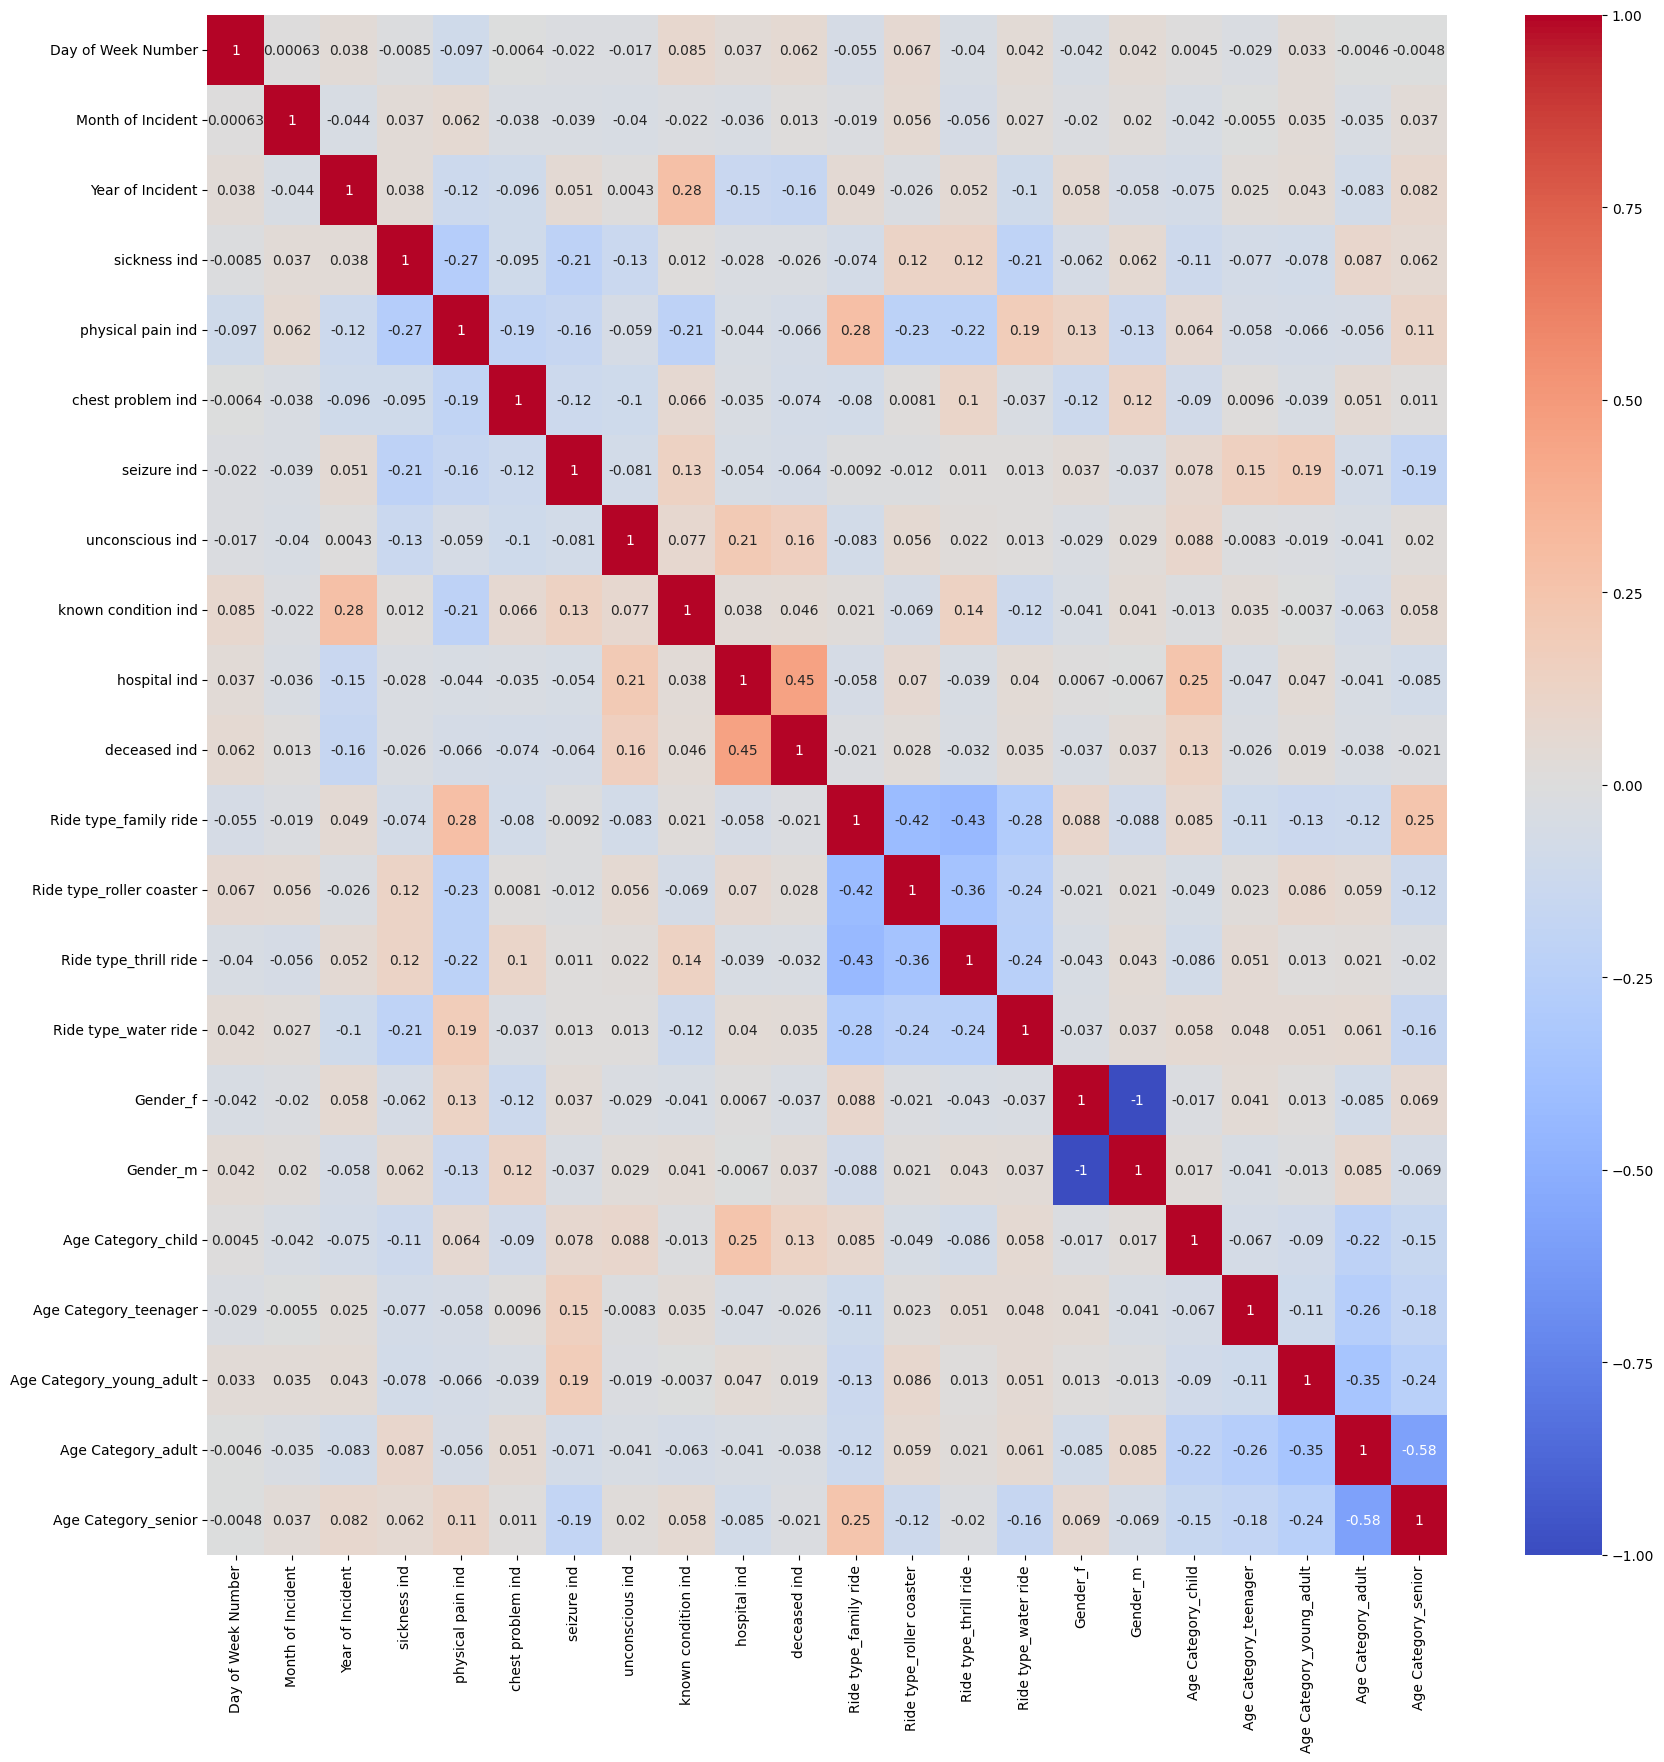

In [124]:

plt.figure(figsize=(20, 20))
corr = df2.corr()
sns.heatmap(corr,cmap="coolwarm", annot=True)

# Análisis de correlación

Algunas correlaciones interesantes pueden deducirse del mapa de calor anterior:

- Los niños pequeños tienen un indicador de hospitalización más alto que cualquier otro grupo de edad. Esto podría deberse a su edad y a la precaución de evitar cualquier riesgo.

- Mirando de cerca las correlaciones entre las visitas al hospital y otras variables encontramos una correlación fuerte con los fallecimientos y débil con la pérdida de conciencia. 

- Las lesiones físicas se producen más en las atracciones familiares. Seguidos de montañas rusas y atracciones emocionantes y, por último, las atracciones acuáticas.

- Los paseos familiares y las personas mayores de 60 años no son una buena combinación; estos dos campos muestran una correlación bastante alta, lo que indica que los incidentes ocurren con bastante frecuencia. Sería interesante ver qué tipo de atracciones son las más usadas por rango de edad.


- Las condiciones preexistentes muestran una correlación bastante alta con el año del incidente. Podría deberse a que ha empezado a registrase ese dato más recientemente.

- En general, no vemos correlaciones muy fuerte, pero el tamaño de datos es relativamente pequeño, por lo que esto debe tenerse en cuenta al hacer estas suposiciones.

In [127]:
df.to_csv("clean_data.csv")